<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS767/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1)
## Keras.io References/learnings

* Keras Tuner (https://keras.io/keras_tuner/)
Keras Tuner is an optimization framework that solves the pain of hyperparameter search.

* Transfer learning & fine-tuning (https://keras.io/guides/transfer_learning/)
Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. 

* Making layers and models via subclassing (https://keras.io/guides/making_new_layers_and_models_via_subclassing/)
Keras provides an option to inherit and customize the layers and create custom models

* Dropout layer (https://keras.io/api/layers/regularization_layers/dropout/)
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting

* ModelCheckpoint (https://keras.io/api/callbacks/model_checkpoint/)
ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing


# Question A)

In [3]:


fashion_mnist = keras.datasets.fashion_mnist

# Load dataset  
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

# Check shape of inputs
X_train_full.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

# Question B)

In [4]:
# divide datasets into training and validation set
X_valid, X_train = X_train_full[:6000] , X_train_full[6000:]
Y_valid, Y_train = Y_train_full[:6000] , Y_train_full[6000:]

# Question C) 

In [5]:
# min-max normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_train_normalized = []
X_valid_normalized = []
X_test_normalized = []
for image_idx, image in enumerate(X_train):
  X_train_normalized.append(min_max_scaler.fit_transform(image))
for image_idx, image in enumerate(X_valid):
  X_valid_normalized.append(min_max_scaler.fit_transform(image))
for image_idx, image in enumerate(X_test):
  X_test_normalized.append(min_max_scaler.fit_transform(image))

# convert to arrays
X_train = np.array(X_train_normalized)
X_valid = np.array(X_valid_normalized)
X_test = np.array(X_test_normalized)

# Question D, E)

In [6]:
# create layers input, hidden and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
output = keras.layers.Dense(10, activation='softmax', name="Output" )

model1 = keras.models.Sequential([input1, hidden1, output])

# compile the model with the loss, optimizer and metrics
model1.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# check model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
# train the model
# the batch size control the number of steps executed in each step in each epoch
# for 54000 images, 1688 steps are executed to complete one pass through all the images with a batch size of 32
hist1 = model1.fit(X_train, Y_train,epochs=20, batch_size=32, validation_data=(X_valid, Y_valid), verbose=2)

Epoch 1/20
1688/1688 - 3s - loss: 0.7101 - accuracy: 0.7605 - val_loss: 0.5339 - val_accuracy: 0.8155
Epoch 2/20
1688/1688 - 2s - loss: 0.5021 - accuracy: 0.8217 - val_loss: 0.4737 - val_accuracy: 0.8357
Epoch 3/20
1688/1688 - 2s - loss: 0.4592 - accuracy: 0.8369 - val_loss: 0.4558 - val_accuracy: 0.8397
Epoch 4/20
1688/1688 - 2s - loss: 0.4340 - accuracy: 0.8451 - val_loss: 0.4283 - val_accuracy: 0.8540
Epoch 5/20
1688/1688 - 2s - loss: 0.4158 - accuracy: 0.8509 - val_loss: 0.4142 - val_accuracy: 0.8573
Epoch 6/20
1688/1688 - 2s - loss: 0.4012 - accuracy: 0.8570 - val_loss: 0.4092 - val_accuracy: 0.8573
Epoch 7/20
1688/1688 - 2s - loss: 0.3892 - accuracy: 0.8611 - val_loss: 0.4028 - val_accuracy: 0.8583
Epoch 8/20
1688/1688 - 2s - loss: 0.3796 - accuracy: 0.8642 - val_loss: 0.3940 - val_accuracy: 0.8610
Epoch 9/20
1688/1688 - 2s - loss: 0.3708 - accuracy: 0.8672 - val_loss: 0.3901 - val_accuracy: 0.8630
Epoch 10/20
1688/1688 - 2s - loss: 0.3627 - accuracy: 0.8700 - val_loss: 0.3781 - 

# Question F
## 1) 

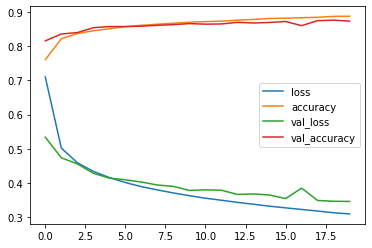

In [8]:
# use model metrics and plot to check the trends for loss, accuracy, validation loss and validation accuracy.
df = pd.DataFrame(hist1.history)
plt.plot(df)
plt.legend(df.columns)

# Question F
## 2)

In [9]:
# create layers input, hidden1, hidden2 and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model2 = keras.models.Sequential([input1, hidden1, hidden2, output])
model2.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [10]:
hist2 = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=2)

Epoch 1/20
1688/1688 - 3s - loss: 0.7268 - accuracy: 0.7523 - val_loss: 0.5342 - val_accuracy: 0.8072
Epoch 2/20
1688/1688 - 2s - loss: 0.4864 - accuracy: 0.8238 - val_loss: 0.4537 - val_accuracy: 0.8402
Epoch 3/20
1688/1688 - 2s - loss: 0.4428 - accuracy: 0.8393 - val_loss: 0.4256 - val_accuracy: 0.8448
Epoch 4/20
1688/1688 - 2s - loss: 0.4164 - accuracy: 0.8494 - val_loss: 0.4074 - val_accuracy: 0.8557
Epoch 5/20
1688/1688 - 2s - loss: 0.3962 - accuracy: 0.8561 - val_loss: 0.4079 - val_accuracy: 0.8540
Epoch 6/20
1688/1688 - 2s - loss: 0.3813 - accuracy: 0.8606 - val_loss: 0.3876 - val_accuracy: 0.8610
Epoch 7/20
1688/1688 - 2s - loss: 0.3687 - accuracy: 0.8661 - val_loss: 0.4136 - val_accuracy: 0.8520
Epoch 8/20
1688/1688 - 2s - loss: 0.3564 - accuracy: 0.8701 - val_loss: 0.3816 - val_accuracy: 0.8615
Epoch 9/20
1688/1688 - 2s - loss: 0.3469 - accuracy: 0.8738 - val_loss: 0.3859 - val_accuracy: 0.8592
Epoch 10/20
1688/1688 - 2s - loss: 0.3386 - accuracy: 0.8767 - val_loss: 0.3650 - 

In [18]:
print(hist2.history)
print(model2.get_weights())


{'loss': [0.7268450260162354, 0.4863717555999756, 0.4427616596221924, 0.41635408997535706, 0.39616474509239197, 0.3812730312347412, 0.3686857223510742, 0.3563603162765503, 0.3469293713569641, 0.33863064646720886, 0.33101987838745117, 0.32238849997520447, 0.31706735491752625, 0.3102729022502899, 0.30496859550476074, 0.2990511655807495, 0.29323241114616394, 0.2891199588775635, 0.2834647595882416, 0.2784998416900635], 'accuracy': [0.7522592544555664, 0.823796272277832, 0.8392592668533325, 0.8494259119033813, 0.8560925722122192, 0.8606111407279968, 0.8660555481910706, 0.8701481223106384, 0.8738333582878113, 0.8766852021217346, 0.8782036900520325, 0.8818703889846802, 0.8837592601776123, 0.8873518705368042, 0.8880370259284973, 0.8904259204864502, 0.8927222490310669, 0.8946481347084045, 0.895814836025238, 0.8994073867797852], 'val_loss': [0.5342085957527161, 0.4537025988101959, 0.42563894391059875, 0.4074294865131378, 0.4079037308692932, 0.38760071992874146, 0.4135732054710388, 0.381564408540

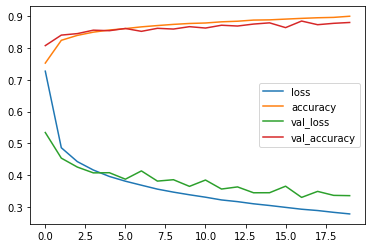

In [12]:
df = pd.DataFrame(hist2.history)
plt.plot(df)
plt.legend(df.columns)

# Question F

## 3)

In [13]:
# create layers input, hidden1, hidden2, hidden3 and output respectively and create the model
input1 = keras.layers.Flatten(input_shape=[28,28])
hidden1 = keras.layers.Dense(100, activation='relu', name="Hidden1")
hidden2 = keras.layers.Dense(100, activation='relu', name="Hidden2")
hidden3 = keras.layers.Dense(100, activation='relu', name="Hidden3")
output = keras.layers.Dense(10, activation='softmax', name="Output" )
model3 = keras.models.Sequential([input1, hidden1, hidden2, hidden3, output])
model3.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
Hidden3 (Dense)              (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist3 = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), verbose=2)

Epoch 1/20
1688/1688 - 3s - loss: 0.7525 - accuracy: 0.7430 - val_loss: 0.4987 - val_accuracy: 0.8248
Epoch 2/20
1688/1688 - 3s - loss: 0.4748 - accuracy: 0.8288 - val_loss: 0.4877 - val_accuracy: 0.8237
Epoch 3/20
1688/1688 - 3s - loss: 0.4281 - accuracy: 0.8444 - val_loss: 0.4792 - val_accuracy: 0.8210
Epoch 4/20
1688/1688 - 3s - loss: 0.4022 - accuracy: 0.8545 - val_loss: 0.4262 - val_accuracy: 0.8460
Epoch 5/20
1688/1688 - 3s - loss: 0.3812 - accuracy: 0.8602 - val_loss: 0.3942 - val_accuracy: 0.8575
Epoch 6/20
1688/1688 - 3s - loss: 0.3655 - accuracy: 0.8665 - val_loss: 0.3661 - val_accuracy: 0.8667
Epoch 7/20
1688/1688 - 3s - loss: 0.3531 - accuracy: 0.8700 - val_loss: 0.3676 - val_accuracy: 0.8663
Epoch 8/20
1688/1688 - 3s - loss: 0.3415 - accuracy: 0.8750 - val_loss: 0.3638 - val_accuracy: 0.8687
Epoch 9/20
1688/1688 - 3s - loss: 0.3313 - accuracy: 0.8774 - val_loss: 0.3556 - val_accuracy: 0.8718
Epoch 10/20
1688/1688 - 3s - loss: 0.3212 - accuracy: 0.8821 - val_loss: 0.3636 - 

In [ ]:
print(hist3.history)
print(model3.get_weights())


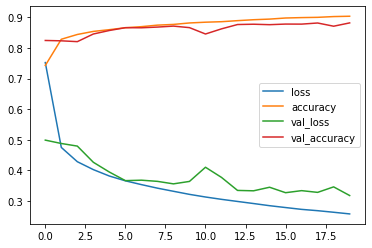

In [15]:
df = pd.DataFrame(hist3.history)
plt.plot(df)
plt.legend(df.columns)